In [1]:
!pip install snntorch
!pip install pytorch_lightning
!pip install lightning-bolts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 974.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [28]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00


In [1]:
from torch.utils.data import Dataset
import os
import pandas as pd
from torchvision.io import read_image
from PIL import Image
from pathlib import Path
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.io import read_image
import matplotlib.pyplot as plt
from torchvision.models import resnet

import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen
import numpy as np
import snntorch as snn
from snntorch import surrogate
from snntorch import functional as SF
from snntorch import utils

from argparse import ArgumentParser
from itertools import chain

import torch
from torch import nn, optim
import torch.nn.functional as F
import torchvision
from pytorch_lightning import LightningModule
from pl_bolts.metrics import precision_at_k

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision import transforms as T
import torch.nn.functional as F

from copy import deepcopy

import itertools

import time
import seaborn as sns



C:\Users\rober\anaconda3\envs\gpu4\Lib\site-packages\pl_bolts\__init__.py:11: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
C:\Users\rober\anaconda3\envs\gpu4\Lib\site-packages\pl_bolts\__init__.py:11: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
C:\Users\rober\anaconda3\envs\gpu4\Lib\site-packages\pl_bolts\models\self_supervised\amdim\amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
C:\Users\rober\anaconda3\envs\gpu4\Lib\site-packages\pl_bolts\models\self_supervised\amd

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [3]:
#!unzip gdrive/MyDrive/EuroSAT_RGB.zip

In [4]:
class EurosatDataset(Dataset):

    def __init__(self, root, transform=None):
        self.root = Path(root)
        self.transform = transform

        self.classes = sorted([d.name for d in self.root.iterdir() if d.is_dir()])
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}

        self.samples = []
        for root, dirs, files in os.walk(root):
          for file in files:
            self.samples.append(root+'/'+file)

    def __getitem__(self, index):
        path = self.samples[index]
        img = Image.open(path)

        target = self.class_to_idx[Path(path).parts[-2]]

        if self.transform is not None:
             img = self.transform(img)

        return img, target

    def __len__(self):
        return len(self.samples)

In [5]:
batch_size = 16
dtype = torch.float
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


In [6]:
trans_comp = T.Compose([
  T.ToTensor(),
  T.Normalize((0,), (1,))
])

In [7]:
dataset = EurosatDataset(root = 'C:\\Users\\rober\\EuroSAT_RGB', transform=trans_comp)
train_dataset, test_dataset = random_split(dataset, [0.9, 0.1])
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle= True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

train_features, train_labels = next(iter(train_dataloader))

torch.Size([16, 3, 64, 64])
torch.Size([16])


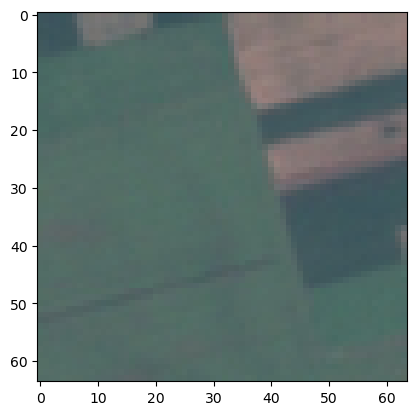

In [8]:
print(train_features.size())

print(train_labels.size())
img = train_features[1].squeeze()
plt.imshow(img.permute(1, 2, 0))

In [9]:
#class for the pretrained model
class MocoV2(LightningModule):

    def __init__(self, base_encoder, emb_dim, num_negatives, emb_spaces=1, *args, **kwargs):
        super().__init__()
        self.save_hyperparameters()

        # create the encoders
        template_model = getattr(torchvision.models, base_encoder)
        self.encoder_q = template_model(num_classes=self.hparams.emb_dim)
        self.encoder_k = template_model(num_classes=self.hparams.emb_dim)

        # remove fc layer
        self.encoder_q = nn.Sequential(*list(self.encoder_q.children())[:-1], nn.Flatten())
        self.encoder_k = nn.Sequential(*list(self.encoder_k.children())[:-1], nn.Flatten())

        for param_q, param_k in zip(self.encoder_q.parameters(), self.encoder_k.parameters()):
            param_k.data.copy_(param_q.data)  # initialize
            param_k.requires_grad = False  # not update by gradient

        # create the projection heads
        self.mlp_dim = 512 * (1 if base_encoder in ['resnet18', 'resnet34'] else 4)
        self.heads_q = nn.ModuleList([
            nn.Sequential(nn.Linear(self.mlp_dim, self.mlp_dim), nn.ReLU(), nn.Linear(self.mlp_dim, emb_dim))
            for _ in range(emb_spaces)
        ])
        self.heads_k = nn.ModuleList([
            nn.Sequential(nn.Linear(self.mlp_dim, self.mlp_dim), nn.ReLU(), nn.Linear(self.mlp_dim, emb_dim))
            for _ in range(emb_spaces)
        ])

        for param_q, param_k in zip(self.heads_q.parameters(), self.heads_k.parameters()):
            param_k.data.copy_(param_q.data)  # initialize
            param_k.requires_grad = False  # not update by gradient

        # create the queue
        self.register_buffer("queue", torch.randn(emb_spaces, emb_dim, num_negatives))
        self.queue = nn.functional.normalize(self.queue, dim=1)

        self.register_buffer("queue_ptr", torch.zeros(emb_spaces, 1, dtype=torch.long))

    @torch.no_grad()
    def _momentum_update_key_encoder(self):
        """
        Momentum update of the key encoder
        """
        for param_q, param_k in zip(self.encoder_q.parameters(), self.encoder_k.parameters()):
            em = self.hparams.encoder_momentum
            param_k.data = param_k.data * em + param_q.data * (1. - em)
        for param_q, param_k in zip(self.heads_q.parameters(), self.heads_k.parameters()):
            em = self.hparams.encoder_momentum
            param_k.data = param_k.data * em + param_q.data * (1. - em)

    @torch.no_grad()
    def _dequeue_and_enqueue(self, keys, queue_idx):
        # gather keys before updating queue
        if self.use_ddp or self.use_ddp2:
            keys = concat_all_gather(keys)

        batch_size = keys.shape[0]

        ptr = int(self.queue_ptr[queue_idx])
        assert self.hparams.num_negatives % batch_size == 0  # for simplicity

        # replace the keys at ptr (dequeue and enqueue)
        self.queue[queue_idx, :, ptr:ptr + batch_size] = keys.T
        ptr = (ptr + batch_size) % self.hparams.num_negatives  # move pointer

        self.queue_ptr[queue_idx] = ptr

    def forward(self, img_q, img_k):
        """
        Input:
            img_q: a batch of query images
            img_k: a batch of key images
        Output:
            logits, targets
        """

        # update the key encoder
        self._momentum_update_key_encoder()

        # compute query features
        v_q = self.encoder_q(img_q)

        # compute key features
        v_k = []
        for i in range(self.hparams.emb_spaces):
            # shuffle for making use of BN
            if self.use_ddp or self.use_ddp2:
                img_k[i], idx_unshuffle = batch_shuffle_ddp(img_k[i])

            with torch.no_grad():  # no gradient to keys
                v_k.append(self.encoder_k(img_k[i]))

            # undo shuffle
            if self.use_ddp or self.use_ddp2:
                v_k[i] = batch_unshuffle_ddp(v_k[i], idx_unshuffle)

        logits = []
        for i in range(self.hparams.emb_spaces):
            # compute query projections
            z_q = self.heads_q[i](v_q)  # queries: NxC
            z_q = nn.functional.normalize(z_q, dim=1)

            # compute key projections
            z_k = []
            for j in range(self.hparams.emb_spaces):
                with torch.no_grad():  # no gradient to keys
                    z_k.append(self.heads_k[i](v_k[j]))  # keys: NxC
                    z_k[j] = nn.functional.normalize(z_k[j], dim=1)

            # select positive and negative pairs
            z_pos = z_k[i]
            z_neg = self.queue[i].clone().detach()
            if i > 0:  # embedding space 0 is invariant to all augmentations
                z_neg = torch.cat([z_neg, *[z_k[j].T for j in range(self.hparams.emb_spaces) if j != i]], dim=1)

            # compute logits
            # Einstein sum is more intuitive
            l_pos = torch.einsum('nc,nc->n', z_q, z_pos).unsqueeze(-1)  # positive logits: Nx1
            l_neg = torch.einsum('nc,ck->nk', z_q, z_neg)  # negative logits: NxK

            l = torch.cat([l_pos, l_neg], dim=1)  # logits: Nx(1+K)
            l /= self.hparams.softmax_temperature  # apply temperature
            logits.append(l)

            # dequeue and enqueue
            self._dequeue_and_enqueue(z_k[i], queue_idx=i)

        # targets: positive key indicators
        targets = torch.zeros(logits[0].shape[0], dtype=torch.long)
        targets = targets.type_as(logits[0])

        return logits, targets

    def training_step(self, batch, batch_idx):
        img_q, img_k = batch
        if self.hparams.emb_spaces == 1 and isinstance(img_k, torch.Tensor):
            img_k = [img_k]

        output, target = self(img_q, img_k)

        losses = []
        accuracies = []
        for out in output:
            losses.append(F.cross_entropy(out.float(), target.long()))
            accuracies.append(precision_at_k(out, target, top_k=(1,))[0])
        loss = torch.sum(torch.stack(losses))

        log = {'train_loss': loss}
        for i, acc in enumerate(accuracies):
            log[f'train_acc/subspace{i}'] = acc

        self.log_dict(log, on_step=True, on_epoch=False, prog_bar=True)
        return loss

    def configure_optimizers(self):
        params = chain(self.encoder_q.parameters(), self.heads_q.parameters())
        optimizer = optim.SGD(params, self.hparams.learning_rate,
                              momentum=self.hparams.momentum,
                              weight_decay=self.hparams.weight_decay)
        return optimizer

    @staticmethod
    def add_model_specific_args(parent_parser):
        parser = ArgumentParser(parents=[parent_parser], add_help=False)
        parser.add_argument('--base_encoder', type=str, default='resnet18')
        parser.add_argument('--emb_dim', type=int, default=128)
        parser.add_argument('--num_workers', type=int, default=32)
        parser.add_argument('--num_negatives', type=int, default=16384)
        parser.add_argument('--encoder_momentum', type=float, default=0.999)
        parser.add_argument('--softmax_temperature', type=float, default=0.07)
        parser.add_argument('--learning_rate', type=float, default=0.03)
        parser.add_argument('--momentum', type=float, default=0.9)
        parser.add_argument('--weight_decay', type=float, default=1e-4)
        parser.add_argument('--batch_size', type=int, default=256)
        return parser


In [10]:
model = MocoV2.load_from_checkpoint("C:\\Users\\rober\\seco_resnet18_1m.ckpt")
backbone = deepcopy(model.encoder_q)
backbone.to(device)

C:\Users\rober\anaconda3\envs\gpu4\Lib\site-packages\pytorch_lightning\utilities\migration\migration.py:195: PossibleUserWarning: You have multiple `ModelCheckpoint` callback states in this checkpoint, but we found state keys that would end up colliding with each other after an upgrade, which means we can't differentiate which of your checkpoint callbacks needs which states. At least one of your `ModelCheckpoint` callbacks will not be able to reload the state.
  rank_zero_warn(
Lightning automatically upgraded your loaded checkpoint from v1.1.4 to v1.9.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file C:\Users\rober\seco_resnet18_1m.ckpt`


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [23]:
def forward_pass(net, num_steps, data, backbone):
  #data = data.view(batch_size, -1)
  with torch.no_grad():
    feats = backbone(data)
  mem_rec = []
  spk_rec = []
  utils.reset(net)  # resets hidden states for all LIF neurons in net
  spike_data = spikegen.rate(feats, num_steps=num_steps, gain=0.95)

  spk_out, mem_out, spk1, spk2, spk3 = net(spike_data)

  return spk_out, mem_out, spk1, spk2, spk3

In [24]:
loss_fn = SF.ce_count_loss()
num_steps = 20

In [25]:
def batch_accuracy(train_loader, net, num_steps):
  with torch.no_grad():
    total = 0
    spikes1 = 0
    spikes2 = 0
    spikes3 = 0
    spikes_out = 0
    acc = 0
    net.eval()

    train_loader = iter(train_loader)
    for data, targets in train_loader:
      data = data.to(device)
      targets = targets.to(device)
      spk_rec, _, spk1, spk2, spk3 = forward_pass(net, num_steps, data, backbone)
      spikes_out += torch.sum(spk_rec)
      spikes1 += torch.sum(spk1)
      spikes2 += torch.sum(spk2)
      spikes3 += torch.sum(spk3)

      acc += SF.accuracy_rate(spk_rec, targets) * spk_rec.size(1)
      total += spk_rec.size(1)

  return acc/total, spikes1/total, spikes2/total, spikes3/total, spikes_out/total

In [26]:
class Net_reset_zero(nn.Module):
   def __init__(self):
      super().__init__()
      hidden = 1028
      hidden2 = 2048

      output = 10

      init_beta = torch.rand(hidden)
      init_beta2 = torch.rand(hidden2)
      init_beta3 = torch.rand(hidden)
      out_beta = torch.rand(output)

      # initialize layers
      self.fc1 = nn.Linear(512, hidden)
      self.lif1 = snn.Leaky(beta=init_beta, reset_mechanism='zero', learn_beta=True, learn_threshold=True)
      self.fc2 = nn.Linear(hidden, hidden2)
      self.lif2 = snn.Leaky(beta=init_beta2, reset_mechanism='zero', learn_beta=True, learn_threshold=True)
      self.fc3 = nn.Linear(hidden2, hidden)
      self.lif3 = snn.Leaky(beta=init_beta3, reset_mechanism='zero', learn_beta=True, learn_threshold=True)
      self.fc4 = nn.Linear(hidden, output)
      self.lif4 = snn.Leaky(beta=out_beta, reset_mechanism='zero', learn_beta=True, learn_threshold=True, output=True)

   def forward(self, x):
      mem1 = self.lif1.init_leaky()
      mem2 = self.lif2.init_leaky()
      mem3 = self.lif3.init_leaky()
      mem4 = self.lif4.init_leaky()

      spk_out_rec = []  # Record the output trace of spikes
      mem_out_rec = []  # Record the output trace of membrane potential
      spk1_rec = []
      spk2_rec = []
      spk3_rec = []
      spk4_rec = []

      for step in range(num_steps):
            cur1 = self.fc1(x[step])
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)
            cur3 = self.fc3(spk2)
            spk3, mem3 = self.lif3(cur3, mem3)
            cur4 = self.fc4(spk3)
            spk4, mem4 = self.lif4(cur4, mem4)

            spk_out_rec.append(spk4)
            mem_out_rec.append(mem4)
            spk1_rec.append(spk1)
            spk2_rec.append(spk2)
            spk3_rec.append(spk3)

      return torch.stack(spk_out_rec), torch.stack(mem_out_rec), torch.stack(spk1_rec), torch.stack(spk2_rec), torch.stack(spk3_rec)

In [27]:
class Net_reset_subtract(nn.Module):
   def __init__(self):
      super().__init__()
      hidden = 1028
      hidden2 = 2048

      output = 10

      init_beta = torch.rand(hidden)
      init_beta2 = torch.rand(hidden2)
      init_beta3 = torch.rand(hidden)
      out_beta = torch.rand(output)

      # initialize layers
      self.fc1 = nn.Linear(512, hidden)
      self.lif1 = snn.Leaky(beta=init_beta, reset_mechanism='zero', learn_beta=True, learn_threshold=True)
      self.fc2 = nn.Linear(hidden, hidden2)
      self.lif2 = snn.Leaky(beta=init_beta2, reset_mechanism='zero', learn_beta=True, learn_threshold=True)
      self.fc3 = nn.Linear(hidden2, hidden)
      self.lif3 = snn.Leaky(beta=init_beta3, reset_mechanism='zero', learn_beta=True, learn_threshold=True)
      self.fc4 = nn.Linear(hidden, output)
      self.lif4 = snn.Leaky(beta=out_beta, reset_mechanism='zero', learn_beta=True, learn_threshold=True, output=True)

   def forward(self, x):
      mem1 = self.lif1.init_leaky()
      mem2 = self.lif2.init_leaky()
      mem3 = self.lif3.init_leaky()
      mem4 = self.lif4.init_leaky()

      spk_out_rec = []  # Record the output trace of spikes
      mem_out_rec = []  # Record the output trace of membrane potential
      spk1_rec = []
      spk2_rec = []
      spk3_rec = []
      spk4_rec = []

      for step in range(num_steps):
            cur1 = self.fc1(x[step])
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)
            cur3 = self.fc3(spk2)
            spk3, mem3 = self.lif3(cur3, mem3)
            cur4 = self.fc4(spk3)
            spk4, mem4 = self.lif4(cur4, mem4)

            spk_out_rec.append(spk4)
            mem_out_rec.append(mem4)
            spk1_rec.append(spk1)
            spk2_rec.append(spk2)
            spk3_rec.append(spk3)

      return torch.stack(spk_out_rec), torch.stack(mem_out_rec), torch.stack(spk1_rec), torch.stack(spk2_rec), torch.stack(spk3_rec)

In [28]:
class Net_init_weights_low(nn.Module):
   def __init__(self):
      super().__init__()
      hidden = 1028
      hidden2 = 2048

      output = 10

      init_beta = torch.rand(hidden)
      init_beta2 = torch.rand(hidden2)
      init_beta3 = torch.rand(hidden)
      out_beta = torch.rand(output)

      # initialize layers
      self.fc1 = nn.Linear(512, hidden)
      self.lif1 = snn.Leaky(beta=init_beta, learn_beta=True, learn_threshold=True)
      self.fc2 = nn.Linear(hidden, hidden2)
      self.lif2 = snn.Leaky(beta=init_beta2, learn_beta=True, learn_threshold=True)
      self.fc3 = nn.Linear(hidden2, hidden)
      self.lif3 = snn.Leaky(beta=init_beta3, learn_beta=True, learn_threshold=True)
      self.fc4 = nn.Linear(hidden, output)
      self.lif4 = snn.Leaky(beta=out_beta, learn_beta=True, learn_threshold=True, output=True)

      nn.init.normal_(self.fc1.weight, mean=-0.01, std=0.1)
      nn.init.normal_(self.fc2.weight, mean=-0.01, std=0.1)
      nn.init.normal_(self.fc3.weight, mean=-0.01, std=0.1)
      nn.init.normal_(self.fc4.weight, mean=-0.01, std=0.1)

   def forward(self, x):
      mem1 = self.lif1.init_leaky()
      mem2 = self.lif2.init_leaky()
      mem3 = self.lif3.init_leaky()
      mem4 = self.lif4.init_leaky()

      spk_out_rec = []  # Record the output trace of spikes
      mem_out_rec = []  # Record the output trace of membrane potential
      spk1_rec = []
      spk2_rec = []
      spk3_rec = []
      spk4_rec = []

      for step in range(num_steps):
            cur1 = self.fc1(x[step])
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)
            cur3 = self.fc3(spk2)
            spk3, mem3 = self.lif3(cur3, mem3)
            cur4 = self.fc4(spk3)
            spk4, mem4 = self.lif4(cur4, mem4)

            spk_out_rec.append(spk4)
            mem_out_rec.append(mem4)
            spk1_rec.append(spk1)
            spk2_rec.append(spk2)
            spk3_rec.append(spk3)

      return torch.stack(spk_out_rec), torch.stack(mem_out_rec), torch.stack(spk1_rec), torch.stack(spk2_rec), torch.stack(spk3_rec)

In [29]:
class Net_init_weights_high(nn.Module):
   def __init__(self):
      super().__init__()
      hidden = 1028
      hidden2 = 2048

      output = 10

      init_beta = torch.rand(hidden)
      init_beta2 = torch.rand(hidden2)
      init_beta3 = torch.rand(hidden)
      out_beta = torch.rand(output)

      # initialize layers
      self.fc1 = nn.Linear(512, hidden)
      self.lif1 = snn.Leaky(beta=init_beta, learn_beta=True, learn_threshold=True)
      self.fc2 = nn.Linear(hidden, hidden2)
      self.lif2 = snn.Leaky(beta=init_beta2, learn_beta=True, learn_threshold=True)
      self.fc3 = nn.Linear(hidden2, hidden)
      self.lif3 = snn.Leaky(beta=init_beta3, learn_beta=True, learn_threshold=True)
      self.fc4 = nn.Linear(hidden, output)
      self.lif4 = snn.Leaky(beta=out_beta, learn_beta=True, learn_threshold=True, output=True)

      nn.init.normal_(self.fc1.weight, mean=0.01, std=0.1)
      nn.init.normal_(self.fc2.weight, mean=0.01, std=0.1)
      nn.init.normal_(self.fc3.weight, mean=0.01, std=0.1)
      nn.init.normal_(self.fc4.weight, mean=0.01, std=0.1)

   def forward(self, x):
      mem1 = self.lif1.init_leaky()
      mem2 = self.lif2.init_leaky()
      mem3 = self.lif3.init_leaky()
      mem4 = self.lif4.init_leaky()

      spk_out_rec = []  # Record the output trace of spikes
      mem_out_rec = []  # Record the output trace of membrane potential
      spk1_rec = []
      spk2_rec = []
      spk3_rec = []
      spk4_rec = []

      for step in range(num_steps):
            cur1 = self.fc1(x[step])
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)
            cur3 = self.fc3(spk2)
            spk3, mem3 = self.lif3(cur3, mem3)
            cur4 = self.fc4(spk3)
            spk4, mem4 = self.lif4(cur4, mem4)

            spk_out_rec.append(spk4)
            mem_out_rec.append(mem4)
            spk1_rec.append(spk1)
            spk2_rec.append(spk2)
            spk3_rec.append(spk3)

      return torch.stack(spk_out_rec), torch.stack(mem_out_rec), torch.stack(spk1_rec), torch.stack(spk2_rec), torch.stack(spk3_rec)

In [30]:
class Net_low_initial_beta(nn.Module):
   def __init__(self):
      super().__init__()
      hidden = 1028
      hidden2 = 2048

      output = 10

      init_beta = torch.rand(hidden).div(3)
      init_beta2 = torch.rand(hidden2).div(3)
      init_beta3 = torch.rand(hidden).div(3)
      out_beta = torch.rand(output).div(3)

      # initialize layers
      self.fc1 = nn.Linear(512, hidden)
      self.lif1 = snn.Leaky(beta=init_beta, learn_beta=True, learn_threshold=True)
      self.fc2 = nn.Linear(hidden, hidden2)
      self.lif2 = snn.Leaky(beta=init_beta2, learn_beta=True, learn_threshold=True)
      self.fc3 = nn.Linear(hidden2, hidden)
      self.lif3 = snn.Leaky(beta=init_beta3, learn_beta=True, learn_threshold=True)
      self.fc4 = nn.Linear(hidden, output)
      self.lif4 = snn.Leaky(beta=out_beta, learn_beta=True, learn_threshold=True, output=True)

   def forward(self, x):
      mem1 = self.lif1.init_leaky()
      mem2 = self.lif2.init_leaky()
      mem3 = self.lif3.init_leaky()
      mem4 = self.lif4.init_leaky()

      spk_out_rec = []  # Record the output trace of spikes
      mem_out_rec = []  # Record the output trace of membrane potential
      spk1_rec = []
      spk2_rec = []
      spk3_rec = []
      spk4_rec = []

      for step in range(num_steps):
            cur1 = self.fc1(x[step])
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)
            cur3 = self.fc3(spk2)
            spk3, mem3 = self.lif3(cur3, mem3)
            cur4 = self.fc4(spk3)
            spk4, mem4 = self.lif4(cur4, mem4)

            spk_out_rec.append(spk4)
            mem_out_rec.append(mem4)
            spk1_rec.append(spk1)
            spk2_rec.append(spk2)
            spk3_rec.append(spk3)

      return torch.stack(spk_out_rec), torch.stack(mem_out_rec), torch.stack(spk1_rec), torch.stack(spk2_rec), torch.stack(spk3_rec)

In [31]:
class Net_medium_initial_beta(nn.Module):
   def __init__(self):
      super().__init__()
      hidden = 1028
      hidden2 = 2048

      output = 10

      init_beta = torch.rand(hidden).div(3).add(1/3)
      init_beta2 = torch.rand(hidden2).div(3).add(1/3)
      init_beta3 = torch.rand(hidden).div(3).add(1/3)
      out_beta = torch.rand(output).div(3).add(1/3)

      # initialize layers
      self.fc1 = nn.Linear(512, hidden)
      self.lif1 = snn.Leaky(beta=init_beta, learn_beta=True, learn_threshold=True)
      self.fc2 = nn.Linear(hidden, hidden2)
      self.lif2 = snn.Leaky(beta=init_beta2, learn_beta=True, learn_threshold=True)
      self.fc3 = nn.Linear(hidden2, hidden)
      self.lif3 = snn.Leaky(beta=init_beta3, learn_beta=True, learn_threshold=True)
      self.fc4 = nn.Linear(hidden, output)
      self.lif4 = snn.Leaky(beta=out_beta, learn_beta=True, learn_threshold=True, output=True)

   def forward(self, x):
      mem1 = self.lif1.init_leaky()
      mem2 = self.lif2.init_leaky()
      mem3 = self.lif3.init_leaky()
      mem4 = self.lif4.init_leaky()

      spk_out_rec = []  # Record the output trace of spikes
      mem_out_rec = []  # Record the output trace of membrane potential
      spk1_rec = []
      spk2_rec = []
      spk3_rec = []
      spk4_rec = []

      for step in range(num_steps):
            cur1 = self.fc1(x[step])
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)
            cur3 = self.fc3(spk2)
            spk3, mem3 = self.lif3(cur3, mem3)
            cur4 = self.fc4(spk3)
            spk4, mem4 = self.lif4(cur4, mem4)

            spk_out_rec.append(spk4)
            mem_out_rec.append(mem4)
            spk1_rec.append(spk1)
            spk2_rec.append(spk2)
            spk3_rec.append(spk3)

      return torch.stack(spk_out_rec), torch.stack(mem_out_rec), torch.stack(spk1_rec), torch.stack(spk2_rec), torch.stack(spk3_rec)

In [32]:
class Net_high_initial_beta(nn.Module):
   def __init__(self):
      super().__init__()
      hidden = 1028
      hidden2 = 2048

      output = 10

      init_beta = torch.rand(hidden).div(3).add(2/3)
      init_beta2 = torch.rand(hidden2).div(3).add(2/3)
      init_beta3 = torch.rand(hidden).div(3).add(2/3)
      out_beta = torch.rand(output).div(3).add(2/3)

      # initialize layers
      self.fc1 = nn.Linear(512, hidden)
      self.lif1 = snn.Leaky(beta=init_beta, learn_beta=True, learn_threshold=True)
      self.fc2 = nn.Linear(hidden, hidden2)
      self.lif2 = snn.Leaky(beta=init_beta2, learn_beta=True, learn_threshold=True)
      self.fc3 = nn.Linear(hidden2, hidden)
      self.lif3 = snn.Leaky(beta=init_beta3, learn_beta=True, learn_threshold=True)
      self.fc4 = nn.Linear(hidden, output)
      self.lif4 = snn.Leaky(beta=out_beta, learn_beta=True, learn_threshold=True, output=True)

   def forward(self, x):
      mem1 = self.lif1.init_leaky()
      mem2 = self.lif2.init_leaky()
      mem3 = self.lif3.init_leaky()
      mem4 = self.lif4.init_leaky()

      spk_out_rec = []  # Record the output trace of spikes
      mem_out_rec = []  # Record the output trace of membrane potential
      spk1_rec = []
      spk2_rec = []
      spk3_rec = []
      spk4_rec = []

      for step in range(num_steps):
            cur1 = self.fc1(x[step])
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = self.fc2(spk1)
            spk2, mem2 = self.lif2(cur2, mem2)
            cur3 = self.fc3(spk2)
            spk3, mem3 = self.lif3(cur3, mem3)
            cur4 = self.fc4(spk3)
            spk4, mem4 = self.lif4(cur4, mem4)

            spk_out_rec.append(spk4)
            mem_out_rec.append(mem4)
            spk1_rec.append(spk1)
            spk2_rec.append(spk2)
            spk3_rec.append(spk3)

      return torch.stack(spk_out_rec), torch.stack(mem_out_rec), torch.stack(spk1_rec), torch.stack(spk2_rec), torch.stack(spk3_rec)

In [33]:
def train(net):
  optimizer = torch.optim.Adam(net.parameters(), lr=1e-5)
  num_epochs = 100
  loss_hist = []
  test_acc_hist = []
  epoch_counter = 0

  # Outer training loop
  for epoch in range(num_epochs):

      epoch_counter += 1

      # Training loop
      for data, targets in iter(train_dataloader):
          data = data.to(device)
          targets = targets.to(device)

          # forward pass
          net.train()
          spk_rec, _, _, _, _, = forward_pass(net, num_steps, data, backbone)
          # initialize the loss & sum over time
          loss_val = loss_fn(spk_rec, targets)

          # Gradient calculation + weight update
          optimizer.zero_grad()
          loss_val.backward()
          optimizer.step()

          # Store loss history for future plotting
          loss_hist.append(loss_val.item())

          # Test set
      if True: #epoch_counter % 10 == 0:
          with torch.no_grad():
              net.eval()
    
              # Test set forward pass
              test_acc, avg_spikes1, avg_spikes2, avg_spikes3, avg_spikes4 = batch_accuracy(test_dataloader, net, num_steps)
              eta = ((time.time() - time_start) / epoch_counter) * (100 - epoch_counter)
              print(f"Epoch {epoch_counter}, Test Acc: {test_acc * 100:.2f}%, eta: {time.strftime('%H:%M:%S', time.gmtime(eta))} \nAverge spike counts: input layer: {avg_spikes1}, second layer: {avg_spikes2}, third layer: {avg_spikes3}, output layer: {avg_spikes4}\n")
              
              test_acc_hist.append(test_acc.item())


  return net

In [34]:
time_start = time.time()
net_high_weights = Net_init_weights_high().to(device)
net_high_weights = train(net_high_weights)
print(time.time()-time_start, "seconds\n")
print("higher initial weights experiment\n")
torch.save(net_high_weights.state_dict(), 'model_high_weights')

Epoch 1, Test Acc: 9.90%, eta: 05:43:31 
Averge spike counts: input layer: 7571.3759765625, second layer: 35912.734375, third layer: 20093.376953125, output layer: 192.2053680419922

Epoch 2, Test Acc: 54.28%, eta: 05:40:16 
Averge spike counts: input layer: 7464.0625, second layer: 35468.65625, third layer: 20052.248046875, output layer: 135.50558471679688

Epoch 3, Test Acc: 66.93%, eta: 05:37:05 
Averge spike counts: input layer: 7483.89892578125, second layer: 35304.06640625, third layer: 20020.45703125, output layer: 98.65364837646484

Epoch 4, Test Acc: 73.81%, eta: 05:33:19 
Averge spike counts: input layer: 7407.7529296875, second layer: 35150.3046875, third layer: 20020.54296875, output layer: 93.04948425292969

Epoch 5, Test Acc: 74.48%, eta: 05:30:08 
Averge spike counts: input layer: 7378.13427734375, second layer: 35033.84765625, third layer: 20026.54296875, output layer: 90.1573715209961

Epoch 6, Test Acc: 74.74%, eta: 05:26:37 
Averge spike counts: input layer: 7312.799

In [35]:
time_start = time.time()
net_low_weights = Net_init_weights_low().to(device)
net_low_weights = train(net_low_weights)
print(time.time()-time_start, "seconds\n")
print("lower initial weights experiment\n")
torch.save(net_low_weights.state_dict(), 'model_low_weights')

Epoch 1, Test Acc: 59.75%, eta: 05:48:46 
Averge spike counts: input layer: 705.997802734375, second layer: 761.9412231445312, third layer: 353.82330322265625, output layer: 8.216890335083008

Epoch 2, Test Acc: 67.89%, eta: 05:44:28 
Averge spike counts: input layer: 756.9501342773438, second layer: 837.8154907226562, third layer: 424.0245666503906, output layer: 13.174479484558105

Epoch 3, Test Acc: 71.76%, eta: 05:40:00 
Averge spike counts: input layer: 776.0718383789062, second layer: 866.4427490234375, third layer: 449.2310485839844, output layer: 15.5505952835083

Epoch 4, Test Acc: 72.81%, eta: 05:36:04 
Averge spike counts: input layer: 789.7202758789062, second layer: 890.9319458007812, third layer: 467.2206115722656, output layer: 17.309152603149414

Epoch 5, Test Acc: 74.70%, eta: 05:32:34 
Averge spike counts: input layer: 800.4025268554688, second layer: 904.7444458007812, third layer: 476.7939147949219, output layer: 18.462797164916992

Epoch 6, Test Acc: 75.74%, eta: 0

In [36]:
time_start = time.time()
net_low_beta = Net_low_initial_beta().to(device)
net_low_beta = train(net_low_beta)
print(time.time()-time_start, "seconds\n")
print("lower initial beta experiment\n")
torch.save(net_low_beta.state_dict(), 'model_low_beta')

Epoch 1, Test Acc: 28.57%, eta: 05:43:41 
Averge spike counts: input layer: 1641.5401611328125, second layer: 2123.08154296875, third layer: 413.6499328613281, output layer: 6.1432294845581055

Epoch 2, Test Acc: 51.38%, eta: 05:41:26 
Averge spike counts: input layer: 2351.525390625, second layer: 4091.930419921875, third layer: 928.2191162109375, output layer: 9.114583969116211

Epoch 3, Test Acc: 59.00%, eta: 05:37:56 
Averge spike counts: input layer: 2822.415283203125, second layer: 5500.6826171875, third layer: 1341.43896484375, output layer: 18.702009201049805

Epoch 4, Test Acc: 67.41%, eta: 05:34:34 
Averge spike counts: input layer: 3276.00537109375, second layer: 6808.09228515625, third layer: 1571.7738037109375, output layer: 21.678199768066406

Epoch 5, Test Acc: 72.99%, eta: 05:31:03 
Averge spike counts: input layer: 3641.80810546875, second layer: 7959.7412109375, third layer: 1759.474365234375, output layer: 21.009300231933594

Epoch 6, Test Acc: 73.18%, eta: 05:27:22 

In [37]:
time_start = time.time()
net_med_beta = Net_medium_initial_beta().to(device)
net_med_beta = train(net_med_beta)
print(time.time()-time_start, "seconds\n")
print("medium initial beta experiment\n")
torch.save(net_med_beta.state_dict(), 'model_med_beta')

Epoch 1, Test Acc: 45.35%, eta: 05:44:47 
Averge spike counts: input layer: 2326.15283203125, second layer: 3710.144775390625, third layer: 893.9390258789062, output layer: 9.1056547164917

Epoch 2, Test Acc: 62.28%, eta: 05:41:02 
Averge spike counts: input layer: 3138.989990234375, second layer: 6428.01416015625, third layer: 1778.7679443359375, output layer: 21.534971237182617

Epoch 3, Test Acc: 73.66%, eta: 05:38:07 
Averge spike counts: input layer: 3551.8896484375, second layer: 8019.64453125, third layer: 2187.580078125, output layer: 25.782365798950195

Epoch 4, Test Acc: 74.14%, eta: 05:34:37 
Averge spike counts: input layer: 3822.6923828125, second layer: 9011.2587890625, third layer: 2444.0595703125, output layer: 28.801340103149414

Epoch 5, Test Acc: 76.56%, eta: 05:30:55 
Averge spike counts: input layer: 3975.094970703125, second layer: 9595.396484375, third layer: 2511.3955078125, output layer: 28.805431365966797

Epoch 6, Test Acc: 79.24%, eta: 05:27:22 
Averge spike

In [38]:
time_start = time.time()
net_high_beta = Net_high_initial_beta().to(device)
net_high_beta = train(net_high_weights)
print(time.time()-time_start, "seconds\n")
print("higher initial beta experiment\n")
torch.save(net_high_beta.state_dict(), 'model_high_beta')

Epoch 1, Test Acc: 84.56%, eta: 05:46:20 
Averge spike counts: input layer: 6988.43701171875, second layer: 33018.45703125, third layer: 20005.404296875, output layer: 44.662574768066406

Epoch 2, Test Acc: 85.01%, eta: 05:42:17 
Averge spike counts: input layer: 6937.341796875, second layer: 32927.06640625, third layer: 20006.47265625, output layer: 44.718379974365234

Epoch 3, Test Acc: 85.53%, eta: 05:38:28 
Averge spike counts: input layer: 6947.0791015625, second layer: 32942.46875, third layer: 19993.1796875, output layer: 45.01674270629883

Epoch 4, Test Acc: 83.89%, eta: 05:35:01 
Averge spike counts: input layer: 7027.20849609375, second layer: 33089.48828125, third layer: 19999.109375, output layer: 44.253719329833984

Epoch 5, Test Acc: 85.57%, eta: 05:31:28 
Averge spike counts: input layer: 6958.0537109375, second layer: 32973.515625, third layer: 20002.275390625, output layer: 44.427085876464844

Epoch 6, Test Acc: 83.82%, eta: 05:28:10 
Averge spike counts: input layer: 

In [39]:
time_start = time.time()
net_zero_reset = Net_reset_zero().to(device)
net_zero_reset = train(net_zero_reset)
print(time.time()-time_start, "seconds\n")
print("zero reset mechanism experiment\n")
torch.save(net_zero_reset.state_dict(), 'model_zero_reset')

Epoch 1, Test Acc: 54.54%, eta: 05:35:28 
Averge spike counts: input layer: 2016.2545166015625, second layer: 2961.334228515625, third layer: 1048.9869384765625, output layer: 10.450521469116211

Epoch 2, Test Acc: 71.84%, eta: 05:32:46 
Averge spike counts: input layer: 2410.9287109375, second layer: 4542.97314453125, third layer: 1894.252685546875, output layer: 26.394718170166016

Epoch 3, Test Acc: 73.07%, eta: 05:28:48 
Averge spike counts: input layer: 2629.85693359375, second layer: 5317.12841796875, third layer: 2239.409912109375, output layer: 28.129465103149414

Epoch 4, Test Acc: 77.75%, eta: 05:25:28 
Averge spike counts: input layer: 2788.66552734375, second layer: 5770.87548828125, third layer: 2410.392822265625, output layer: 26.707590103149414

Epoch 5, Test Acc: 78.20%, eta: 05:22:01 
Averge spike counts: input layer: 2778.40966796875, second layer: 5813.3994140625, third layer: 2453.28173828125, output layer: 28.0859375

Epoch 6, Test Acc: 79.72%, eta: 05:18:39 
Averg

In [40]:
time_start = time.time()
net_subtract_reset = Net_reset_subtract().to(device)
net_subtract_reset = train(net_subtract_reset)
print(time.time()-time_start, "seconds\n")
print("subtract reset mechanism experiment\n")
torch.save(net_subtract_reset.state_dict(), 'model_subtract_reset')

Epoch 1, Test Acc: 51.60%, eta: 05:37:14 
Averge spike counts: input layer: 1891.87060546875, second layer: 2789.972412109375, third layer: 1047.5416259765625, output layer: 11.316964149475098

Epoch 2, Test Acc: 69.98%, eta: 05:33:24 
Averge spike counts: input layer: 2363.39501953125, second layer: 4565.57958984375, third layer: 2034.0294189453125, output layer: 26.93266487121582

Epoch 3, Test Acc: 75.04%, eta: 05:29:59 
Averge spike counts: input layer: 2560.67626953125, second layer: 5335.7890625, third layer: 2429.09375, output layer: 28.73772430419922

Epoch 4, Test Acc: 75.63%, eta: 05:26:29 
Averge spike counts: input layer: 2680.72802734375, second layer: 5715.58154296875, third layer: 2614.805419921875, output layer: 29.21651840209961

Epoch 5, Test Acc: 78.42%, eta: 05:23:10 
Averge spike counts: input layer: 2708.320068359375, second layer: 5829.62255859375, third layer: 2692.345703125, output layer: 29.061756134033203

Epoch 6, Test Acc: 78.27%, eta: 05:19:40 
Averge spik